In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.01
training_epochs = 40

In [3]:
trX = np.linspace(-1, 1, 101)

In [5]:
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0

In [6]:
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)

In [7]:
trY += np.random.randn(*trX.shape) * 1.5

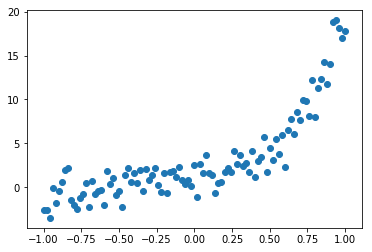

In [8]:
plt.scatter(trX, trY)
plt.show()

In [9]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [10]:
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

In [12]:
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
cost = (tf.pow(Y-y_model, 2))

In [14]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [17]:
for epoch in range(training_epochs):
    for(x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X:x, Y:y})

In [18]:
w_val = sess.run(w)

In [19]:
print(w_val)

[1.1066837 2.6438031 3.9823132 4.419144  3.6108902 3.7739837]


In [20]:
sess.close()

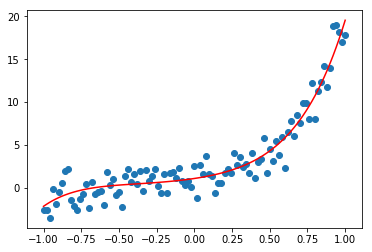

In [22]:
plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()